In [39]:
# Netflix Content Analysis - Case Study 1
# Author: [Yathushan]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

In [40]:
# Preview
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [41]:
# Check missing values
df.isnull().sum()

# Strip leading/trailing spaces first
df['date_added'] = df['date_added'].str.strip()

# Now convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values (simple example)
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")

In [42]:
df['date_added'].head(10)
df['date_added'].isnull().sum()

np.int64(10)

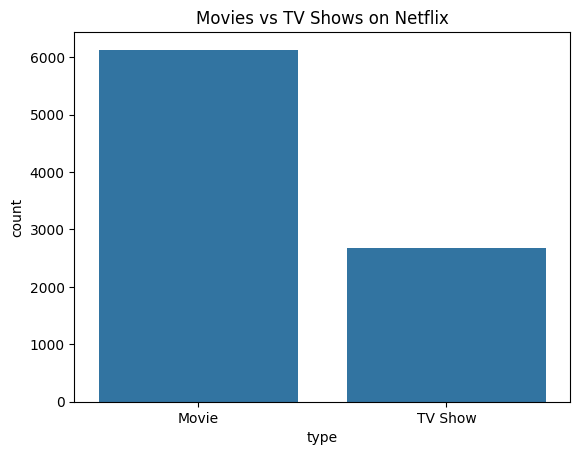

In [43]:
# EDA Content type distribution
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

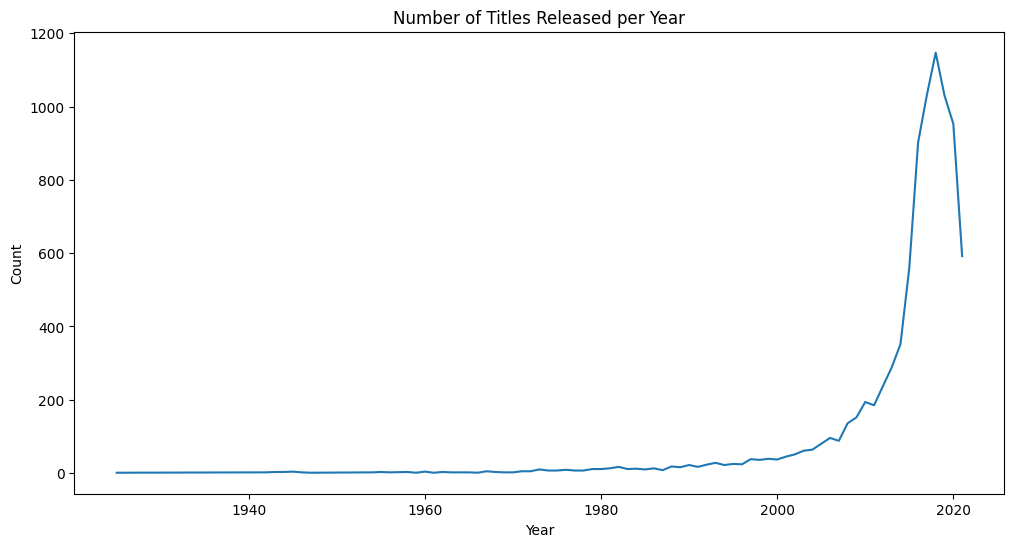

In [44]:
# EDA Content over the years
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Number of Titles Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

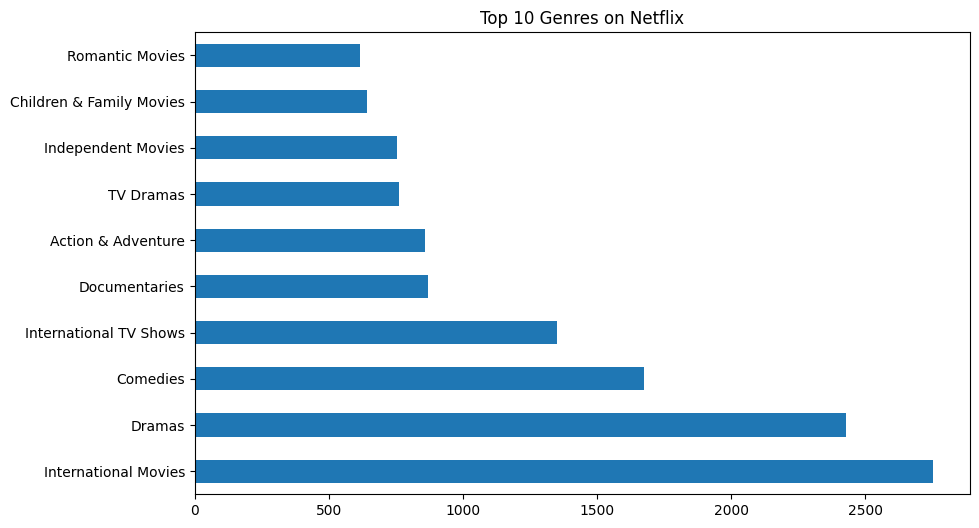

In [45]:
# EDA Most popular genres
from collections import Counter

# Split genres
all_genres = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])

# Plot top 10 genres
pd.Series(genre_counts).nlargest(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Genres on Netflix")
plt.show()

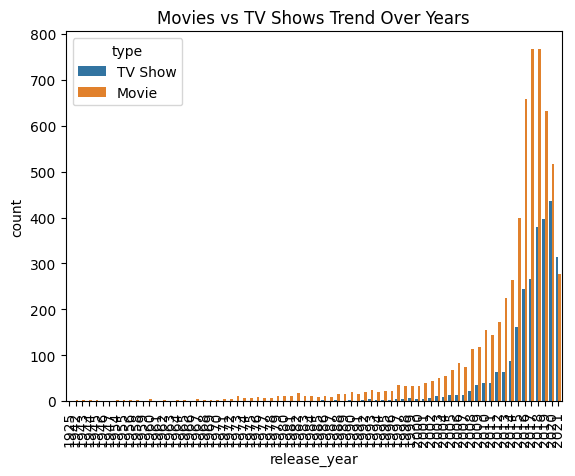

In [46]:
sns.countplot(data=df, x="release_year", hue="type")
plt.title("Movies vs TV Shows Trend Over Years")
plt.xticks(rotation=90)
plt.show()